In [ ]:
# load some default Python modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
plt.style.use('seaborn-whitegrid')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
X = pd.read_csv('../content/train.csv',parse_dates=['pickup_time','drop_time'])
test = pd.read_csv('../content/test.csv',parse_dates=['pickup_time','drop_time'])


In [ ]:
X.label = X.label.map({"correct":1,"incorrect":0})


In [ ]:
Y = X.label
X.drop('label',axis=1,inplace=True)

In [ ]:
new_features = pd.DataFrame()

In [ ]:
new_test_features = pd.DataFrame()


In [ ]:
X.head()

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare
0,189123628,10.5,834.0,56.0,0.0000,64.0,2019-11-01 00:20:00,2019-11-01 00:34:00,6.86252,79.8993,6.90330,79.8783,270.32
1,189125358,10.5,791.0,47.0,0.0000,134.0,2019-11-01 00:56:00,2019-11-01 01:09:00,6.88589,79.8984,6.91373,79.8923,197.85
2,189125719,10.5,1087.0,80.0,0.0000,61.0,2019-11-01 01:08:00,2019-11-01 01:26:00,6.90839,79.8651,6.93669,79.9146,301.64
3,189127273,10.5,598.0,271.0,15.6638,68.0,2019-11-01 02:27:00,2019-11-01 02:37:00,6.92570,79.8895,6.92748,79.8971,82.30
4,189128020,NaN,NaN,NaN,NaN,NaN,2019-11-01 03:34:00,2019-11-01 03:51:00,6.87441,79.8615,6.84478,79.9290,358.39


In [ ]:
X['cal_duration'] = (X.drop_time-X.pickup_time).astype('timedelta64[s]')
test['cal_duration'] = (test.drop_time-test.pickup_time).astype('timedelta64[s]')

In [ ]:
X.drop(['pickup_time','drop_time'],axis='columns',inplace=True)
test.drop(['pickup_time','drop_time'],axis='columns',inplace=True)


In [ ]:
imputed_X_train.head()

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pick_lat,pick_lon,drop_lat,drop_lon,fare,distance
0,189123628.0,10.500000,834.000000,56.000000,0.000000,64.000000,6.86252,79.8993,6.90330,79.8783,270.32,238.561749
1,189125358.0,10.500000,791.000000,47.000000,0.000000,134.000000,6.88589,79.8984,6.91373,79.8923,197.85,248.720276
2,189125719.0,10.500000,1087.000000,80.000000,0.000000,61.000000,6.90839,79.8651,6.93669,79.9146,301.64,467.462894
3,189127273.0,10.500000,598.000000,271.000000,15.663800,68.000000,6.92570,79.8895,6.92748,79.8971,82.30,162.074759
4,189128020.0,13.719651,1702.858077,629.074231,32.057666,112.466832,6.87441,79.8615,6.84478,79.9290,358.39,323.428180


In [ ]:
test.head()

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pick_lat,pick_lon,drop_lat,drop_lon,fare,pickup_time_edited,cal_duration
0,213284604,10.5,924,42,2.4486,148,6.83454,79.8750,6.77490,79.8840,289.27,2280,900.0
1,213286352,10.5,4249,20,0.0000,91,6.91168,79.8723,6.55091,79.9706,1912.70,3720,4260.0
2,213293973,10.5,1552,255,2.6588,23,6.92145,79.8478,6.90539,79.8989,394.00,18120,1560.0
3,213294622,10.5,462,16,0.0000,198,6.77433,79.9416,6.80401,79.9407,154.32,19800,480.0
4,213298687,10.5,814,392,12.3692,69,6.97968,79.9130,6.98875,79.8914,147.47,25200,840.0


In [ ]:
from sklearn.impute import SimpleImputer
# Imputation
my_imputer = SimpleImputer()
imputed_X_train = pd.DataFrame(my_imputer.fit_transform(X))
imputed_X_train.columns = X.columns


In [ ]:
# (Fare - Waiting Fare)/Distance
imputed_X_train['feature_1'] = (imputed_X_train.fare - imputed_X_train.meter_waiting_fare)/imputed_X_train.distance
test['feature_1'] = (test.fare - test.meter_waiting_fare)/test.distance

In [ ]:
# (Fare - Waiting Fare)/(Duration - meter waiting)
imputed_X_train['feature_2'] = (imputed_X_train.fare - imputed_X_train.meter_waiting_fare)/(imputed_X_train.duration - imputed_X_train.meter_waiting)
test['feature_2'] = (test.fare - test.meter_waiting_fare)/(test.duration - test.meter_waiting)

In [ ]:
# Distance/(Duration - meter waiting)
imputed_X_train['feature_3'] = imputed_X_train.distance/(imputed_X_train.duration - imputed_X_train.meter_waiting)
test['feature_3'] = test.distance/(test.duration - test.meter_waiting)

In [ ]:
# Meter Waiting / Duration
imputed_X_train['feature_4'] = imputed_X_train.meter_waiting/imputed_X_train.duration
test['feature_4'] = test.meter_waiting/test.duration

In [ ]:
# Additional Fare / Distance
imputed_X_train['feature_5'] = imputed_X_train.additional_fare/imputed_X_train.distance
test['feature_5'] = test.additional_fare/test.distance

In [ ]:
# Additional Fare / Fare + Additional Fare
imputed_X_train['feature_6'] = imputed_X_train.additional_fare/(imputed_X_train.additional_fare+imputed_X_train.fare)
test['feature_6'] = test.additional_fare/(test.additional_fare+test.fare)

In [ ]:
# Additional Fare / Fare + Additional Fare
imputed_X_train['feature_7'] = (imputed_X_train.duration - imputed_X_train.meter_waiting)/imputed_X_train.fare
test['feature_7'] = (test.duration - test.meter_waiting)/test.fare

In [ ]:
# Additional Fare / Fare + Additional Fare
imputed_X_train['feature_8'] = imputed_X_train.distance/(imputed_X_train.fare-imputed_X_train.meter_waiting_fare)
test['feature_8'] = test.distance/(test.fare-test.meter_waiting_fare)

In [ ]:
from math import radians, cos, sin, asin, sqrt

def distance(lat1, lat2, lon1, lon2):
  dist_array = []
  for i in range (len(lat1)):
    # The math module contains a function named 
    # radians which converts from degrees to radians. 
    lon1_i = radians(lon1[i]) 
    lon2_i = radians(lon2[i]) 
    lat1_i = radians(lat1[i]) 
    lat2_i = radians(lat2[i])
        
    # Haversine formula  
    dlon = lon2_i - lon1_i  
    dlat = lat2_i - lat1_i 
    a = sin(dlat / 2)*2 + cos(lat1_i) * cos(lat2_i) * sin(dlon / 2)*2
    c = 2 * asin(sqrt(abs(a)))  
      
    # Radius of earth in kilometers. Use 3956 for miles 
    r = 6371
        
    # calculate the result 
    dist = c * r
    dist_array.append(dist)
  return dist_array



In [ ]:
imputed_X_train['distance'] = distance(imputed_X_train['pick_lat'], imputed_X_train['drop_lat'], imputed_X_train['pick_lon'], imputed_X_train['drop_lon'])
test['distance'] = distance(test['pick_lat'], test['drop_lat'], test['pick_lon'], test['drop_lon'])

In [ ]:
imputed_X_train.head()

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pick_lat,pick_lon,drop_lat,drop_lon,fare,distance
0,189123628.0,10.500000,834.000000,56.000000,0.000000,64.000000,6.86252,79.8993,6.90330,79.8783,270.32,238.561749
1,189125358.0,10.500000,791.000000,47.000000,0.000000,134.000000,6.88589,79.8984,6.91373,79.8923,197.85,248.720276
2,189125719.0,10.500000,1087.000000,80.000000,0.000000,61.000000,6.90839,79.8651,6.93669,79.9146,301.64,467.462894
3,189127273.0,10.500000,598.000000,271.000000,15.663800,68.000000,6.92570,79.8895,6.92748,79.8971,82.30,162.074759
4,189128020.0,13.719651,1702.858077,629.074231,32.057666,112.466832,6.87441,79.8615,6.84478,79.9290,358.39,323.428180


In [ ]:
imputed_X_train.drop(['pick_lat','drop_lat','pick_lon','drop_lon'],axis=1,inplace=True)
test.drop(['pick_lat','drop_lat','pick_lon','drop_lon'],axis=1,inplace=True)

In [ ]:
Y.drop(imputed_X_train.loc[imputed_X_train.additional_fare>5000].index,axis=0,inplace=True)
imputed_X_train.drop(imputed_X_train.loc[imputed_X_train.additional_fare>5000].index,axis=0,inplace=True)


In [ ]:
imputed_X_train.drop(['duration'],axis=1,inplace=True)
test.drop(['duration'],axis=1,inplace=True)

In [ ]:
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(imputed_X_train)
normalized_X = pd.DataFrame(transformer.transform(imputed_X_train))
normalized_test = pd.DataFrame(transformer.transform(test))

In [ ]:
normalized_X.columns = imputed_X_train.columns
normalized_test.columns = test.columns

In [ ]:
normalized_X.describe()

,tripid,additional_fare,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,fare,WEEKDAY,cal_duration,distance
count,17175.000000,17175.000000,17175.000000,17175.000000,17175.000000,17175.000000,17175.000000,17175.000000,17175.000000
mean,0.007157,2.475470,1.463695,2.031268,0.328742,0.412139,-0.022606,0.550817,0.099666
std,0.550641,12.988195,23.517505,29.591825,3.756069,2.402540,0.485872,6.429908,0.820827
min,-0.903402,-10.500000,-0.383234,-0.015225,-0.632479,-0.893967,-0.750000,-0.809524,-1.164859
25%,-0.487061,0.000000,-0.284431,-0.015225,-0.410256,-0.365376,-0.500000,-0.380952,-0.456050
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.512939,0.000000,0.715569,0.984775,0.589744,0.634624,0.500000,0.619048,0.543950
max,0.920079,440.320000,1357.850299,1710.411190,437.726496,112.193810,0.750000,359.380952,33.180326


In [ ]:
dropping_clms = ['additional_fare','meter_waiting']
normalized_X.drop(columns=dropping_clms,axis=1,inplace=True)
normalized_test.drop(columns=dropping_clms,axis=1,inplace=True)

In [ ]:
imputed_X_train.drop('tripid',axis=1,inplace=True)
test.drop('tripid',axis=1,inplace=True)

In [ ]:
imputed_X_train

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,fare,cal_duration,distance,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8
0,189123628.0,10.500000,834.000000,56.000000,0.000000,64.000000,270.32,840.0,238.561749,1.133124,0.347455,0.306635,0.067146,0.044014,0.037390,2.878070,0.882516
1,189125358.0,10.500000,791.000000,47.000000,0.000000,134.000000,197.85,780.0,248.720276,0.795472,0.265927,0.334301,0.059418,0.042216,0.050396,3.760425,1.257115
2,189125719.0,10.500000,1087.000000,80.000000,0.000000,61.000000,301.64,1080.0,467.462894,0.645270,0.299543,0.464213,0.073597,0.022462,0.033639,3.338417,1.549738
3,189127273.0,10.500000,598.000000,271.000000,15.663800,68.000000,82.30,600.0,162.074759,0.411145,0.203780,0.495641,0.453177,0.064785,0.113147,3.973269,2.432233
4,189128020.0,13.719651,1702.858077,629.074231,32.057666,112.466832,358.39,1020.0,323.428180,1.008979,0.303909,0.301204,0.369423,0.042419,0.036870,2.996132,0.991101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17171,213803193.0,10.500000,838.000000,93.000000,5.421900,451.000000,198.26,840.0,218.679338,0.881830,0.258843,0.293529,0.110979,0.048016,0.050297,3.757692,1.134005
17172,213812756.0,10.500000,2151.000000,428.000000,0.000000,39.000000,581.23,2160.0,610.039915,0.952774,0.337336,0.354057,0.198977,0.017212,0.017745,2.964403,1.049567
17173,213813930.0,10.500000,263.000000,9.000000,0.000000,110.000000,76.20,240.0,175.947043,0.433085,0.300000,0.692705,0.034221,0.059677,0.121107,3.333333,2.309016
17174,213815405.0,10.500000,858.000000,115.000000,0.000000,317.000000,133.31,840.0,200.508947,0.664858,0.179421,0.269864,0.134033,0.052367,0.073013,5.573475,1.504080


In [ ]:
 imputed_X_train.isnull().sum()

tripid                        0
additional_fare               0
duration                      0
meter_waiting                 0
meter_waiting_fare            0
meter_waiting_till_pickup     0
fare                          0
cal_duration                  0
distance                      0
feature_1                    37
feature_2                    14
feature_3                    14
feature_4                     2
feature_5                    37
feature_6                    14
feature_7                    14
feature_8                    14
dtype: int64

In [ ]:
imputed_X_train=imputed_X_train.replace([np.inf, -np.inf], np.nan)
test=test.replace([np.inf, -np.inf], np.nan)

In [ ]:
from sklearn.impute import SimpleImputer
# Imputation
my_imputer = SimpleImputer()
imputed_new_features = pd.DataFrame(my_imputer.fit_transform(imputed_X_train))
imputed_new_features.columns = imputed_X_train.columns
imputed_new_test_features = pd.DataFrame(my_imputer.transform(test))
imputed_new_test_features.columns = test.columns

In [ ]:
from sklearn.model_selection import train_test_split
# Break off validation set from training data
X_train, X_valid, y_train, y_valid = train_test_split(imputed_new_features, Y,
                                                      train_size=0.8, test_size=0.2,
                                                      random_state=0)

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
for i in range(1,35):
  classifier = KNeighborsClassifier(n_neighbors=i,p=1,leaf_size=1)
  classifier.fit(X_train, y_train)
  preds = classifier.predict(X_valid)
  print("Depth - {} , score {}".format(i,f1_score(y_valid, preds, average='macro')))

Depth - 1 , score 0.7519194916301954
Depth - 2 , score 0.7462193514738442
Depth - 3 , score 0.788632574101954
Depth - 4 , score 0.7972757089087102
Depth - 5 , score 0.7978697930691633
Depth - 6 , score 0.8082126190444068
Depth - 7 , score 0.8010474147429584
Depth - 8 , score 0.8077216676060259
Depth - 9 , score 0.806842150235882
Depth - 10 , score 0.8122197615755752
Depth - 11 , score 0.8062161964006747
Depth - 12 , score 0.8124007306226175
Depth - 13 , score 0.7951065975634102
Depth - 14 , score 0.8029789932405996
Depth - 15 , score 0.8036780575565388
Depth - 16 , score 0.8049105717382408
Depth - 17 , score 0.795138506696019
Depth - 18 , score 0.8062161964006747
Depth - 19 , score 0.787682388672228
Depth - 20 , score 0.7971487381400835
Depth - 21 , score 0.7869633373107789
Depth - 22 , score 0.7871880119619961
Depth - 23 , score 0.7834855080657319
Depth - 24 , score 0.7884637006741768
Depth - 25 , score 0.7833868600435613
Depth - 26 , score 0.7876083898957282
Depth - 27 , score 0.7763

KeyboardInterrupt: ignored

In [ ]:
from xgboost import XGBClassifier

In [ ]:
# max_depth=11,reg_lambda=0.8,subsample=1,scale_pos_weight=1
for i in range(2,30):
  classifier = XGBClassifier(n_estimators=800,learning_rate=0.065,max_depth=3,reg_lambda=i/30)
  classifier.fit(X_train, y_train)
  preds = classifier.predict(X_valid)
  print("Estimators - {} , score {}".format(i,f1_score(y_valid, preds, average='macro')))

Estimators - 2 , score 0.8647249680979787
Estimators - 3 , score 0.8618106187266951
Estimators - 4 , score 0.8636907463630665
Estimators - 5 , score 0.865261947087734
Estimators - 6 , score 0.8628330096098386
Estimators - 7 , score 0.8625358967051757
Estimators - 8 , score 0.8621040745126627
Estimators - 9 , score 0.863993059793311
Estimators - 10 , score 0.8648419189353089
Estimators - 11 , score 0.8607997237550284
Estimators - 12 , score 0.861087527794623
Estimators - 13 , score 0.863993059793311
Estimators - 14 , score 0.861087527794623
Estimators - 15 , score 0.859647861549723
Estimators - 16 , score 0.8641151598246497
Estimators - 17 , score 0.864418966613324
Estimators - 18 , score 0.8632633732082169
Estimators - 19 , score 0.8621040745126627
Estimators - 20 , score 0.861087527794623
Estimators - 21 , score 0.8636907463630665
Estimators - 22 , score 0.8621040745126627
Estimators - 23 , score 0.8658820450739596
Estimators - 24 , score 0.8659894334822407
Estimators - 25 , score 0.8

In [ ]:
print(classifier)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=1100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import f1_score
for i in range(10,25):
  classifier = RandomForestClassifier(max_depth=27, random_state=102435,n_estimators=22)
  classifier.fit(X_train, y_train)
  preds = classifier.predict(X_valid)
  print("Depth - {} , score {}".format(i,f1_score(y_valid, preds, average='macro')))

Depth - 10 , score 0.8344765022495313
Depth - 11 , score 0.8379065379065379
Depth - 12 , score 0.8348067898098219
Depth - 13 , score 0.8405134592096271
Depth - 14 , score 0.8407403040418291
Depth - 15 , score 0.8410196693178535
Depth - 16 , score 0.8434981495911481
Depth - 17 , score 0.8410196693178535
Depth - 18 , score 0.8437051976236929
Depth - 19 , score 0.8410196693178535
Depth - 20 , score 0.8444031488231434
Depth - 21 , score 0.8467315374860742
Depth - 22 , score 0.8462891712616507
Depth - 23 , score 0.8455344655344654
Depth - 24 , score 0.8427198044613864


In [ ]:
normalized_X

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,fare,cal_duration,distance
0,-0.903172,0.000000,-0.156402,-0.215569,-0.015225,-0.085470,0.240440,-0.142857,-0.041600
1,-0.903045,0.000000,-0.191248,-0.242515,-0.015225,0.512821,-0.063603,-0.190476,0.006232
2,-0.903018,0.000000,0.048622,-0.143713,-0.015225,-0.111111,0.371840,0.047619,1.036186
3,-0.902903,0.000000,-0.347650,0.428144,1.007417,-0.051282,-0.548384,-0.333333,-0.401740
4,-0.902848,3.219651,0.547697,1.500222,2.077722,0.328776,0.609931,0.000000,0.357996
...,...,...,...,...,...,...,...,...,...
17171,0.918703,0.000000,-0.153160,-0.104790,0.338754,3.222222,-0.061882,-0.142857,-0.135216
17172,0.919409,0.000000,0.910859,0.898204,-0.015225,-0.299145,1.544839,0.904762,1.707512
17173,0.919495,0.000000,-0.619125,-0.356287,-0.015225,0.307692,-0.573976,-0.619048,-0.336422
17174,0.919604,0.000000,-0.136953,-0.038922,-0.015225,2.076923,-0.334375,-0.142857,-0.220772


In [ ]:
classifier = XGBClassifier(n_estimators=800,learning_rate=0.065)
classifier.fit(X_train, y_train)
preds_rand = pd.DataFrame(classifier.predict(imputed_new_test_features))
preds_rand.columns = ['prediction']
preds_rand['tripid'] = test['tripid']
f_cols = ['tripid','prediction']
preds_rand = preds_rand[f_cols]

In [ ]:
preds_rand

,tripid,prediction
0,213284604,1
1,213286352,0
2,213293973,1
3,213294622,1
4,213298687,1
...,...,...
8571,222856243,1
8572,222857785,1
8573,222858416,1
8574,222858691,1


In [ ]:
preds_rand['prediction'] = preds_rand['prediction'].astype(int)
preds_rand.to_csv('../content/submission_new_with_newf2.csv',index=False)

In [ ]:

f_cols = ['tripid','prediction']
preds_rand = preds_rand[f_cols]
preds_rand.head()


preds_rand['prediction'] = preds_rand['prediction'].astype(int)
preds_rand.to_csv('../content/submission5.csv',index=False)

In [ ]:
preds_rand

,tripid,prediction
0,213284604,1
1,213286352,1
2,213293973,1
3,213294622,1
4,213298687,1
...,...,...
8571,222856243,1
8572,222857785,1
8573,222858416,1
8574,222858691,1


/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:403: RuntimeWarning: invalid value encountered in greater_equal
  keep = (a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:404: RuntimeWarning: invalid value encountered in less_equal
  keep &= (a <= last_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


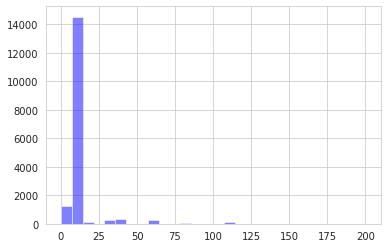

In [ ]:
n, bins, patches = plt.hist(X['additional_fare'], bins='auto', facecolor='blue', alpha=0.5)
plt.show()

In [ ]:
# X['pickup_time_edited'] = X['pickup_time'].dt.time
X['pickup_time_edited'] = (X['pickup_time'].dt.hour*60+X['pickup_time'].dt.minute)*60 + X['pickup_time'].dt.second



In [ ]:
test['pickup_time_edited'] = (test['pickup_time'].dt.hour*60+test['pickup_time'].dt.minute)*60 + test['pickup_time'].dt.second


In [ ]:
X['pickup_time_edited']

0         1200
1         3360
2         4080
3         8820
4        12840
         ...  
17171    79620
17172    83220
17173    84060
17174    85140
17175    85740
Name: pickup_time_edited, Length: 17176, dtype: int64

AttributeError: ignored

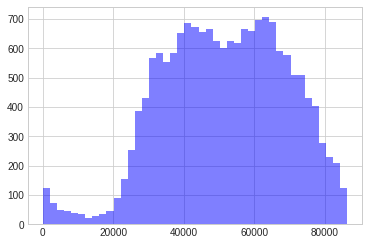

In [ ]:
n, bins, patches = plt.hist(X['pickup_time_edited'], bins='auto', facecolor='blue', alpha=0.5)
plt.show()

In [ ]:
X.set_index('pickup_time_edited').plot()

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fe31ace30d0> (for post_execute):


ValueError: ignored

ValueError: ignored

0        00:20:00
1        00:56:00
2        01:08:00
3        02:27:00
4        03:34:00
           ...   
17171    22:07:00
17172    23:07:00
17173    23:21:00
17174    23:39:00
17175    23:49:00
Name: pickup_time_edited, Length: 17176, dtype: object

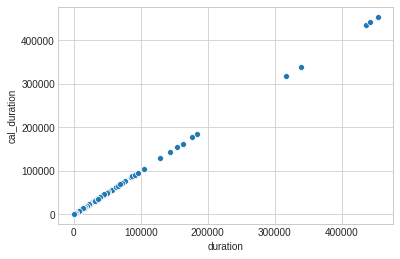

In [ ]:
sns.scatterplot(x=X['duration'], y=X['cal_duration'])

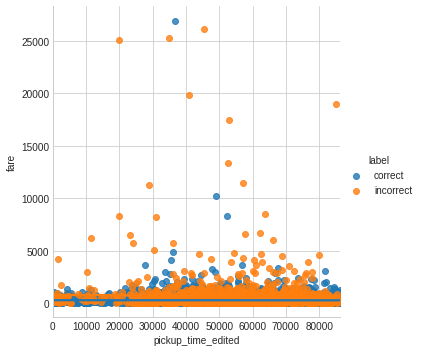

In [ ]:
sns.lmplot(x="pickup_time_edited", y="fare", hue="label", data=X)

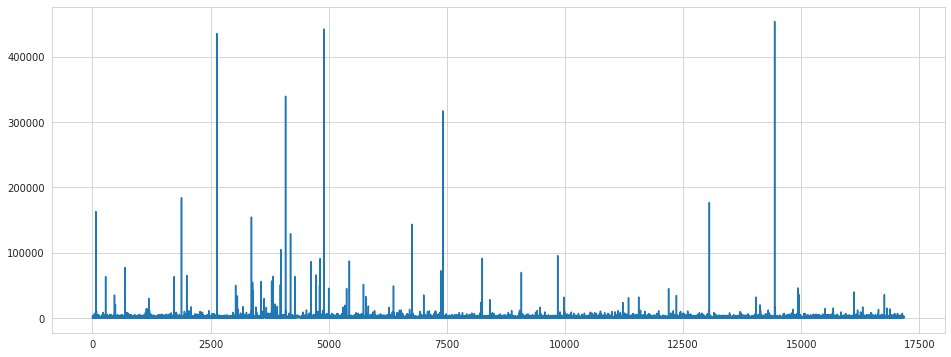

In [ ]:
# Set the width and height of the figure
plt.figure(figsize=(16,6))


sns.lineplot(data=X['duration'])

In [ ]:
X.loc[X.additional_fare > 1000].index

Int64Index([14043], dtype='int64')

In [ ]:
X = X.drop(X.loc[X.additional_fare > 1000].index)

In [ ]:
X.describe()

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pick_lat,pick_lon,drop_lat,drop_lon,fare,label
count,1.717500e+04,16973.000000,16973.000000,16973.000000,16973.000000,16973.000000,17175.000000,17175.000000,17175.000000,17175.000000,17038.000000,17175.000000
mean,2.014545e+08,12.966613,1702.956048,616.729040,31.337669,112.462735,6.965488,79.998396,6.968577,79.997541,311.200781,0.902183
std,7.456803e+06,13.065004,8120.390005,7901.452393,455.947327,442.067513,0.210761,0.243389,0.378678,0.359658,574.762349,0.297075
min,1.891236e+08,0.000000,0.000000,0.000000,0.000000,0.000000,5.937600,79.819100,5.941860,45.307700,0.000000,0.000000
25%,1.947617e+08,10.500000,548.000000,33.000000,0.000000,26.000000,6.865075,79.870400,6.865620,79.870100,125.507500,1.000000
50%,2.013575e+08,10.500000,1010.000000,123.000000,0.116600,73.000000,6.914100,79.898600,6.916160,79.899100,211.135000,1.000000
75%,2.083038e+08,10.500000,1803.000000,351.000000,14.341800,144.000000,7.043035,79.956600,7.047070,79.960250,366.395000,1.000000
max,2.138173e+08,450.820000,453872.000000,453650.000000,26198.601400,51288.000000,8.051010,81.009600,48.132000,81.009700,26945.990000,1.000000


In [ ]:
X.loc[X.duration > 100000]

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,label
74,189213407,5.0,162747.0,162277.0,9460.7491,0.0,11/1/2019 13:35,11/3/2019 10:48,6.78440,79.8845,6.89959,79.8646,10264.42,1
1885,191245326,10.5,183996.0,183756.0,10591.6188,3.0,11/11/2019 7:59,11/13/2019 11:06,7.00407,79.9670,7.10361,80.0536,11243.34,0
2632,192121471,10.5,435397.0,435308.0,25098.4362,39.0,11/15/2019 9:39,11/20/2019 10:35,6.88741,79.8631,6.89370,79.8705,25315.09,0
3365,193341290,10.5,154423.0,121319.0,7012.2382,11722.0,11/20/2019 15:52,11/22/2019 10:45,6.00961,80.2404,6.03564,80.2698,11503.81,0
3987,194361105,10.5,104637.0,104596.0,6008.7724,20.0,11/23/2019 17:19,11/24/2019 22:23,6.89156,79.9041,7.00827,79.8979,6646.56,0
4088,194554416,10.5,339351.0,339312.0,19570.7332,44.0,11/24/2019 11:21,11/28/2019 9:37,6.93536,79.9377,6.91406,79.8894,19865.46,0
4193,194653084,10.5,128831.0,116777.0,6808.0991,1.0,11/25/2019 5:33,11/26/2019 17:20,7.00101,79.8881,6.98583,79.8760,8316.22,0
4898,195593822,10.5,442190.0,431741.0,24954.6298,7.0,11/28/2019 12:36,12/3/2019 15:26,6.89518,79.8530,6.92415,79.8628,26098.75,0
6764,198685804,10.5,143303.0,143291.0,8233.1476,1617.0,12/7/2019 17:44,12/9/2019 9:32,7.08931,79.9167,7.10423,79.8845,8522.32,0
7415,199689558,10.5,316978.0,316725.0,18465.0675,37.0,12/10/2019 23:37,12/14/2019 15:40,6.78298,79.8842,6.71216,79.9097,18962.60,0


In [ ]:
X = X.drop(X.loc[X.duration > 100000].index)


In [ ]:
X.head()

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,label
0,189123628,10.5,834.0,56.0,0.0000,64.0,11/1/2019 0:20,11/1/2019 0:34,6.86252,79.8993,6.90330,79.8783,270.32,1
1,189125358,10.5,791.0,47.0,0.0000,134.0,11/1/2019 0:56,11/1/2019 1:09,6.88589,79.8984,6.91373,79.8923,197.85,1
2,189125719,10.5,1087.0,80.0,0.0000,61.0,11/1/2019 1:08,11/1/2019 1:26,6.90839,79.8651,6.93669,79.9146,301.64,1
3,189127273,10.5,598.0,271.0,15.6638,68.0,11/1/2019 2:27,11/1/2019 2:37,6.92570,79.8895,6.92748,79.8971,82.30,1
4,189128020,NaN,NaN,NaN,NaN,NaN,11/1/2019 3:34,11/1/2019 3:51,6.87441,79.8615,6.84478,79.9290,358.39,1


In [ ]:
object_cols = [col for col in X.columns if X[col].dtype == "object"]
object_cols

['pickup_time', 'drop_time', 'label']

In [ ]:
pd.to_datetime(X['pickup_time'])

0       2019-11-01 00:20:00
1       2019-11-01 00:56:00
2       2019-11-01 01:08:00
3       2019-11-01 02:27:00
4       2019-11-01 03:34:00
                ...        
17171   2020-01-31 22:07:00
17172   2020-01-31 23:07:00
17173   2020-01-31 23:21:00
17174   2020-01-31 23:39:00
17175   2020-01-31 23:49:00
Name: pickup_time, Length: 17163, dtype: datetime64[ns]

In [ ]:
X['pickup_time'] = pd.to_datetime(X['pickup_time'])
X['drop_time'] = pd.to_datetime(X['drop_time'])

In [ ]:
test['pickup_time'] = pd.to_datetime(test['pickup_time'])
test['drop_time'] = pd.to_datetime(test['drop_time'])

In [ ]:
X.head()

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,label
0,189123628,10.5,834.0,56.0,0.0000,64.0,2019-11-01 00:20:00,2019-11-01 00:34:00,6.86252,79.8993,6.90330,79.8783,270.32,1
1,189125358,10.5,791.0,47.0,0.0000,134.0,2019-11-01 00:56:00,2019-11-01 01:09:00,6.88589,79.8984,6.91373,79.8923,197.85,1
2,189125719,10.5,1087.0,80.0,0.0000,61.0,2019-11-01 01:08:00,2019-11-01 01:26:00,6.90839,79.8651,6.93669,79.9146,301.64,1
3,189127273,10.5,598.0,271.0,15.6638,68.0,2019-11-01 02:27:00,2019-11-01 02:37:00,6.92570,79.8895,6.92748,79.8971,82.30,1
4,189128020,NaN,NaN,NaN,NaN,NaN,2019-11-01 03:34:00,2019-11-01 03:51:00,6.87441,79.8615,6.84478,79.9290,358.39,1


In [ ]:
missing_val_count_by_column = (imputed_X_train.isnull().sum())
missing_val_count_by_column[missing_val_count_by_column>0]

Series([], dtype: int64)

In [ ]:
X

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,label,cal_duration
0,189123628,10.5,834.0,56.0,0.0000,64.0,2019-11-01 00:20:00,2019-11-01 00:34:00,6.86252,79.8993,6.90330,79.8783,270.32,1,840.0
1,189125358,10.5,791.0,47.0,0.0000,134.0,2019-11-01 00:56:00,2019-11-01 01:09:00,6.88589,79.8984,6.91373,79.8923,197.85,1,780.0
2,189125719,10.5,1087.0,80.0,0.0000,61.0,2019-11-01 01:08:00,2019-11-01 01:26:00,6.90839,79.8651,6.93669,79.9146,301.64,1,1080.0
3,189127273,10.5,598.0,271.0,15.6638,68.0,2019-11-01 02:27:00,2019-11-01 02:37:00,6.92570,79.8895,6.92748,79.8971,82.30,1,600.0
4,189128020,NaN,NaN,NaN,NaN,NaN,2019-11-01 03:34:00,2019-11-01 03:51:00,6.87441,79.8615,6.84478,79.9290,358.39,1,1020.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17171,213803193,10.5,838.0,93.0,5.4219,451.0,2020-01-31 22:07:00,2020-01-31 22:21:00,7.29073,80.6367,7.28891,80.6557,198.26,1,840.0
17172,213812756,10.5,2151.0,428.0,0.0000,39.0,2020-01-31 23:07:00,2020-01-31 23:43:00,6.90569,79.8516,6.95089,79.9389,581.23,1,2160.0
17173,213813930,10.5,263.0,9.0,0.0000,110.0,2020-01-31 23:21:00,2020-01-31 23:25:00,7.09210,79.9000,7.10135,79.9017,76.20,1,240.0
17174,213815405,10.5,858.0,115.0,0.0000,317.0,2020-01-31 23:39:00,2020-01-31 23:53:00,6.94540,79.8768,6.93574,79.9010,133.31,1,840.0


In [ ]:
X['cal_duration'] = (X.drop_time-X.pickup_time).astype('timedelta64[s]')
test['cal_duration'] = (test.drop_time-test.pickup_time).astype('timedelta64[s]')


In [ ]:
cols = X.columns.tolist()
cols = cols[-1:] + cols[:-1]
cols

['cal_duration',
 'tripid',
 'additional_fare',
 'duration',
 'meter_waiting',
 'meter_waiting_fare',
 'meter_waiting_till_pickup',
 'pickup_time',
 'drop_time',
 'pick_lat',
 'pick_lon',
 'drop_lat',
 'drop_lon',
 'fare',
 'label']

In [ ]:
X = X[cols]
test = test[cols]

KeyError: ignored

In [ ]:
test.head()

,cal_duration,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare
0,900.0,213284604,10.5,924,42,2.4486,148,2020-02-01 00:38:00,2020-02-01 00:53:00,6.83454,79.8750,6.77490,79.8840,289.27
1,4260.0,213286352,10.5,4249,20,0.0000,91,2020-02-01 01:02:00,2020-02-01 02:13:00,6.91168,79.8723,6.55091,79.9706,1912.70
2,1560.0,213293973,10.5,1552,255,2.6588,23,2020-02-01 05:02:00,2020-02-01 05:28:00,6.92145,79.8478,6.90539,79.8989,394.00
3,480.0,213294622,10.5,462,16,0.0000,198,2020-02-01 05:30:00,2020-02-01 05:38:00,6.77433,79.9416,6.80401,79.9407,154.32
4,840.0,213298687,10.5,814,392,12.3692,69,2020-02-01 07:00:00,2020-02-01 07:14:00,6.97968,79.9130,6.98875,79.8914,147.47


In [ ]:
test_new = test.drop(['pickup_time',
 'drop_time',
 'pick_lat',
 'pick_lon',
 'drop_lat',
 'drop_lon','tripid'],axis='columns')

In [ ]:
test_new.head()

,distance,cal_duration,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,fare
0,379.339797,900.0,10.5,924,42,2.4486,148,289.27
1,865.296123,4260.0,10.5,4249,20,0.0000,91,1912.70
2,311.791508,1560.0,10.5,1552,255,2.6588,23,394.00
3,285.662305,480.0,10.5,462,16,0.0000,198,154.32
4,186.020487,840.0,10.5,814,392,12.3692,69,147.47


In [ ]:
from sklearn.impute import SimpleImputer
imputed_X_train = X
# Imputation
my_imputer = SimpleImputer()
imputed_X_train = pd.DataFrame(my_imputer.fit_transform(X.drop(['pickup_time','drop_time'],axis='columns')))
imputed_X_train.columns = X.drop(['pickup_time','drop_time'],axis='columns').columns


In [ ]:
imputed_X_train.columns = X.drop(['pickup_time','drop_time'],axis='columns').columns

In [ ]:
imputed_X_train

,distance,cal_duration,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pick_lat,pick_lon,drop_lat,drop_lon,fare,label
0,238.561749,840.0,189123628.0,10.500000,834.000000,56.000000,0.000000,64.000000,6.86252,79.8993,6.90330,79.8783,270.32,1.0
1,248.720276,780.0,189125358.0,10.500000,791.000000,47.000000,0.000000,134.000000,6.88589,79.8984,6.91373,79.8923,197.85,1.0
2,467.462894,1080.0,189125719.0,10.500000,1087.000000,80.000000,0.000000,61.000000,6.90839,79.8651,6.93669,79.9146,301.64,1.0
3,162.074759,600.0,189127273.0,10.500000,598.000000,271.000000,15.663800,68.000000,6.92570,79.8895,6.92748,79.8971,82.30,1.0
4,323.428180,1020.0,189128020.0,13.719651,1702.858077,629.074231,32.057666,112.466832,6.87441,79.8615,6.84478,79.9290,358.39,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17171,218.679338,840.0,213803193.0,10.500000,838.000000,93.000000,5.421900,451.000000,7.29073,80.6367,7.28891,80.6557,198.26,1.0
17172,610.039915,2160.0,213812756.0,10.500000,2151.000000,428.000000,0.000000,39.000000,6.90569,79.8516,6.95089,79.9389,581.23,1.0
17173,175.947043,240.0,213813930.0,10.500000,263.000000,9.000000,0.000000,110.000000,7.09210,79.9000,7.10135,79.9017,76.20,1.0
17174,200.508947,840.0,213815405.0,10.500000,858.000000,115.000000,0.000000,317.000000,6.94540,79.8768,6.93574,79.9010,133.31,1.0


In [ ]:
test

,cal_duration,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare
0,900.0,213284604,10.5,924,42,2.44860,148,2020-02-01 00:38:00,2020-02-01 00:53:00,6.83454,79.8750,6.77490,79.8840,289.27
1,4260.0,213286352,10.5,4249,20,0.00000,91,2020-02-01 01:02:00,2020-02-01 02:13:00,6.91168,79.8723,6.55091,79.9706,1912.70
2,1560.0,213293973,10.5,1552,255,2.65880,23,2020-02-01 05:02:00,2020-02-01 05:28:00,6.92145,79.8478,6.90539,79.8989,394.00
3,480.0,213294622,10.5,462,16,0.00000,198,2020-02-01 05:30:00,2020-02-01 05:38:00,6.77433,79.9416,6.80401,79.9407,154.32
4,840.0,213298687,10.5,814,392,12.36920,69,2020-02-01 07:00:00,2020-02-01 07:14:00,6.97968,79.9130,6.98875,79.8914,147.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8571,1680.0,222856243,10.5,1723,429,24.83332,3,2020-03-16 21:28:00,2020-03-16 21:56:00,6.85103,79.9567,6.85588,79.9214,388.48
8572,1380.0,222857785,10.5,1378,80,0.00000,125,2020-03-16 21:59:00,2020-03-16 22:22:00,6.91293,79.9656,6.92112,79.8980,379.85
8573,420.0,222858416,10.5,418,56,3.28440,93,2020-03-16 22:02:00,2020-03-16 22:09:00,6.85718,79.9081,6.83868,79.9083,112.79
8574,1620.0,222858691,10.5,1604,548,31.67440,17,2020-03-16 22:07:00,2020-03-16 22:34:00,6.91289,79.8846,6.93159,79.9145,248.46


In [ ]:
from math import radians, cos, sin, asin, sqrt

def distance(lat1, lat2, lon1, lon2):
  dist_array = []
  for i in range (len(lat1)):
    # The math module contains a function named 
    # radians which converts from degrees to radians. 
    lon1_i = radians(lon1[i]) 
    lon2_i = radians(lon2[i]) 
    lat1_i = radians(lat1[i]) 
    lat2_i = radians(lat2[i])
        
    # Haversine formula  
    dlon = lon2_i - lon1_i  
    dlat = lat2_i - lat1_i 
    a = sin(dlat / 2)*2 + cos(lat1_i) * cos(lat2_i) * sin(dlon / 2)*2
    c = 2 * asin(sqrt(abs(a)))  
      
    # Radius of earth in kilometers. Use 3956 for miles 
    r = 6371
        
    # calculate the result 
    dist = c * r
    dist_array.append(dist)
  return dist_array

test['distance'] = distance(test['pick_lat'], test['drop_lat'], test['pick_lon'], test['drop_lon'])

In [ ]:
cols = imputed_X_train.columns.tolist()
cols = cols[-1:] + cols[:-1]
imputed_X_train = imputed_X_train[cols]

In [ ]:
cols = test.columns.tolist()
cols = cols[-1:] + cols[:-1]
cols
test = test[cols]

In [ ]:
test

,distance,cal_duration,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare
0,379.339797,900.0,213284604,10.5,924,42,2.44860,148,2020-02-01 00:38:00,2020-02-01 00:53:00,6.83454,79.8750,6.77490,79.8840,289.27
1,865.296123,4260.0,213286352,10.5,4249,20,0.00000,91,2020-02-01 01:02:00,2020-02-01 02:13:00,6.91168,79.8723,6.55091,79.9706,1912.70
2,311.791508,1560.0,213293973,10.5,1552,255,2.65880,23,2020-02-01 05:02:00,2020-02-01 05:28:00,6.92145,79.8478,6.90539,79.8989,394.00
3,285.662305,480.0,213294622,10.5,462,16,0.00000,198,2020-02-01 05:30:00,2020-02-01 05:38:00,6.77433,79.9416,6.80401,79.9407,154.32
4,186.020487,840.0,213298687,10.5,814,392,12.36920,69,2020-02-01 07:00:00,2020-02-01 07:14:00,6.97968,79.9130,6.98875,79.8914,147.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8571,291.335381,1680.0,222856243,10.5,1723,429,24.83332,3,2020-03-16 21:28:00,2020-03-16 21:56:00,6.85103,79.9567,6.85588,79.9214,388.48
8572,406.973705,1380.0,222857785,10.5,1378,80,0.00000,125,2020-03-16 21:59:00,2020-03-16 22:22:00,6.91293,79.9656,6.92112,79.8980,379.85
8573,227.750160,420.0,222858416,10.5,418,56,3.28440,93,2020-03-16 22:02:00,2020-03-16 22:09:00,6.85718,79.9081,6.83868,79.9083,112.79
8574,369.492830,1620.0,222858691,10.5,1604,548,31.67440,17,2020-03-16 22:07:00,2020-03-16 22:34:00,6.91289,79.8846,6.93159,79.9145,248.46


In [ ]:
x_data = imputed_X_train.drop(['tripid','label',
 'pick_lat',
 'pick_lon',
 'drop_lat',
 'drop_lon'],axis='columns')
y = imputed_X_train.label

In [ ]:
test

,distance,cal_duration,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare
0,379.339797,900.0,213284604,10.5,924,42,2.44860,148,2020-02-01 00:38:00,2020-02-01 00:53:00,6.83454,79.8750,6.77490,79.8840,289.27
1,865.296123,4260.0,213286352,10.5,4249,20,0.00000,91,2020-02-01 01:02:00,2020-02-01 02:13:00,6.91168,79.8723,6.55091,79.9706,1912.70
2,311.791508,1560.0,213293973,10.5,1552,255,2.65880,23,2020-02-01 05:02:00,2020-02-01 05:28:00,6.92145,79.8478,6.90539,79.8989,394.00
3,285.662305,480.0,213294622,10.5,462,16,0.00000,198,2020-02-01 05:30:00,2020-02-01 05:38:00,6.77433,79.9416,6.80401,79.9407,154.32
4,186.020487,840.0,213298687,10.5,814,392,12.36920,69,2020-02-01 07:00:00,2020-02-01 07:14:00,6.97968,79.9130,6.98875,79.8914,147.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8571,291.335381,1680.0,222856243,10.5,1723,429,24.83332,3,2020-03-16 21:28:00,2020-03-16 21:56:00,6.85103,79.9567,6.85588,79.9214,388.48
8572,406.973705,1380.0,222857785,10.5,1378,80,0.00000,125,2020-03-16 21:59:00,2020-03-16 22:22:00,6.91293,79.9656,6.92112,79.8980,379.85
8573,227.750160,420.0,222858416,10.5,418,56,3.28440,93,2020-03-16 22:02:00,2020-03-16 22:09:00,6.85718,79.9081,6.83868,79.9083,112.79
8574,369.492830,1620.0,222858691,10.5,1604,548,31.67440,17,2020-03-16 22:07:00,2020-03-16 22:34:00,6.91289,79.8846,6.93159,79.9145,248.46


In [ ]:
from sklearn.model_selection import train_test_split
# Break off validation set from training data
X_train, X_valid, y_train, y_valid = train_test_split(x_data, y,
                                                      train_size=0.8, test_size=0.2,
                                                      random_state=0)

In [ ]:
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.metrics import f1_score
for i in range(5,20):
  classifier = dtc(max_depth=i,random_state=0)
  classifier.fit(X_train, y_train)
  preds = classifier.predict(X_valid)
  print("Depth - {} , score {}".format(i,f1_score(y_valid, preds, average='macro')))


Depth - 5 , score 0.7447440754773048
Depth - 6 , score 0.7721286123320283
Depth - 7 , score 0.7755152089004616
Depth - 8 , score 0.7886202134337728
Depth - 9 , score 0.7936321411063143
Depth - 10 , score 0.7900786392990263
Depth - 11 , score 0.7935564910274318
Depth - 12 , score 0.8063624786197665
Depth - 13 , score 0.8140316982278384
Depth - 14 , score 0.8080431455157786
Depth - 15 , score 0.8036276800995055
Depth - 16 , score 0.8048445042524548
Depth - 17 , score 0.8046644634730011
Depth - 18 , score 0.8069731652220011
Depth - 19 , score 0.7894403191655712


0.7494653924539354

In [ ]:
from sklearn.ensemble import RandomForestClassifier
for i in range(75,95):
  classifier = RandomForestClassifier(max_depth=28, random_state=0,n_estimators=i)
  classifier.fit(X_train, y_train)
  preds = classifier.predict(X_valid)
  print("Depth - {} , score {}".format(i,f1_score(y_valid, preds, average='macro')))

Depth - 75 , score 0.8274127993211389
Depth - 76 , score 0.8259790064827378
Depth - 77 , score 0.8266947271550116
Depth - 78 , score 0.8272856746019497
Depth - 79 , score 0.8281332363725908
Depth - 80 , score 0.8287216894105085
Depth - 81 , score 0.8260993101758167
Depth - 82 , score 0.8274127993211389
Depth - 83 , score 0.8260993101758167
Depth - 84 , score 0.8253823616660935
Depth - 85 , score 0.8254993731940906
Depth - 86 , score 0.8254993731940906


KeyboardInterrupt: ignored

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=28, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=80,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
preds_rand

,0
0,1.0
1,0.0
2,1.0
3,1.0
4,1.0
...,...
8571,1.0
8572,1.0
8573,1.0
8574,1.0


In [ ]:
f1_score(y_valid, preds_rand, average='macro')

0.7945571438257794

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
for i in range(25,35):
  classifier = KNeighborsClassifier(n_neighbors=6,p=2,leaf_size=i,weights='uniform')
  classifier.fit(X_train, y_train)
  preds = classifier.predict(X_valid)
  print("Depth - {} , score {}".format(i,f1_score(y_valid, preds, average='macro')))

Depth - 25 , score 0.8083587417267791
Depth - 26 , score 0.8083587417267791
Depth - 27 , score 0.8083587417267791
Depth - 28 , score 0.8083587417267791
Depth - 29 , score 0.8083587417267791
Depth - 30 , score 0.8083587417267791
Depth - 31 , score 0.8083587417267791
Depth - 32 , score 0.8083587417267791
Depth - 33 , score 0.8083587417267791
Depth - 34 , score 0.8083587417267791


In [ ]:
classifier = KNeighborsClassifier(n_neighbors=6,p=2,leaf_size=30,weights='uniform')

In [ ]:
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [ ]:
preds = classifier.predict(test_new)

In [ ]:
preds

array([1., 1., 1., ..., 1., 1., 1.])

In [ ]:
final = pd.DataFrame(preds)

,0,tripid
0,1.0,213284604
1,0.0,213286352
2,1.0,213293973
3,1.0,213294622
4,1.0,213298687


In [ ]:
preds_rand.columns = ['prediction','tripid']

In [ ]:
preds_rand

,tripid,prediction
0,213284604,1
1,213286352,0
2,213293973,1
3,213294622,1
4,213298687,1
...,...,...
8571,222856243,1
8572,222857785,1
8573,222858416,1
8574,222858691,1
